In [1]:
# Install the latest required dependencies for this project
# !pip install torch torchvision
# !pip install matplotlib
# !pip install --upgrade matplotlib
# !pip install scikit-learn

# Install dependencies regarding ipynb if something isnt working properly(i had some issues when i tried running it in VS code)

#  -m pip install jupyter
#  -m pip install ipykernel
#  -m ipykernel install --user --name=myenv
# !pip install torchvision
# pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# pip3 install sammon-mapping

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn import manifold


#### Section 1: Load and Explore the MNIST Dataset ####


C:\Users\dania\AppData\Local\Temp\ipykernel_26284\3514010765.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(all_features_mds[:, 0], all_features_mds[:, 1], c=all_labels, cmap=plt.cm.get_cmap('viridis', 10), marker='o')


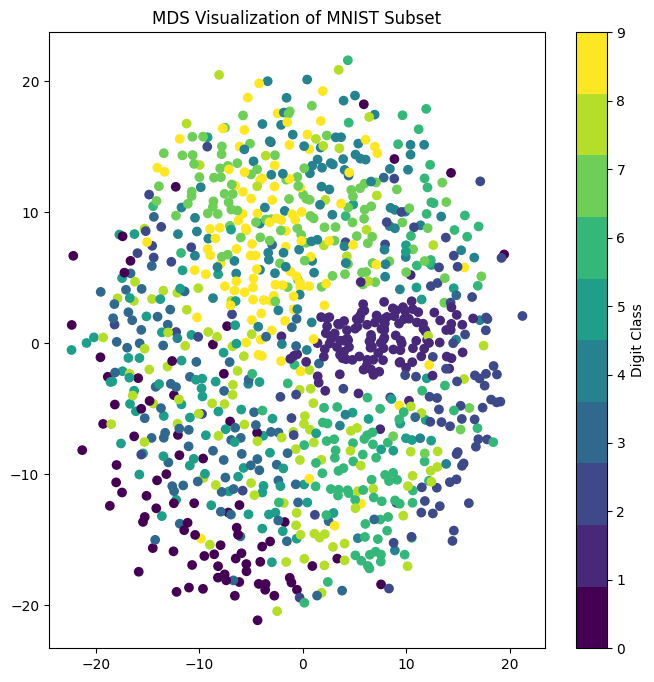

In [3]:
# Define transform for data preprocessing
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

subset_size = 1000
train_dataset_subset = torch.utils.data.Subset(train_dataset, np.random.choice(len(train_dataset), subset_size, replace=False))

train_loader = DataLoader(dataset=train_dataset_subset, batch_size=len(train_dataset_subset), shuffle=True)

all_features, all_labels = next(iter(train_loader))

# Flatten the features
all_features = all_features.view(len(train_dataset_subset), -1).numpy()

# Create an MDS model
mds = manifold.MDS(n_components=2, random_state=42)

# Fit the model to the data and transform the data
all_features_mds = mds.fit_transform(all_features)

# Scatter plot the MDS representation
plt.figure(figsize=(8, 8))
plt.scatter(all_features_mds[:, 0], all_features_mds[:, 1], c=all_labels, cmap=plt.cm.get_cmap('viridis', 10), marker='o')
plt.title('MDS Visualization of MNIST Subset')
plt.colorbar(ticks=range(10), label='Digit Class')
plt.show()

C:\Users\dania\AppData\Local\Temp\ipykernel_26284\1388436304.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(y[:, 0], y[:, 1], c=all_labels, cmap=plt.cm.get_cmap('tab10', 10), marker='o')


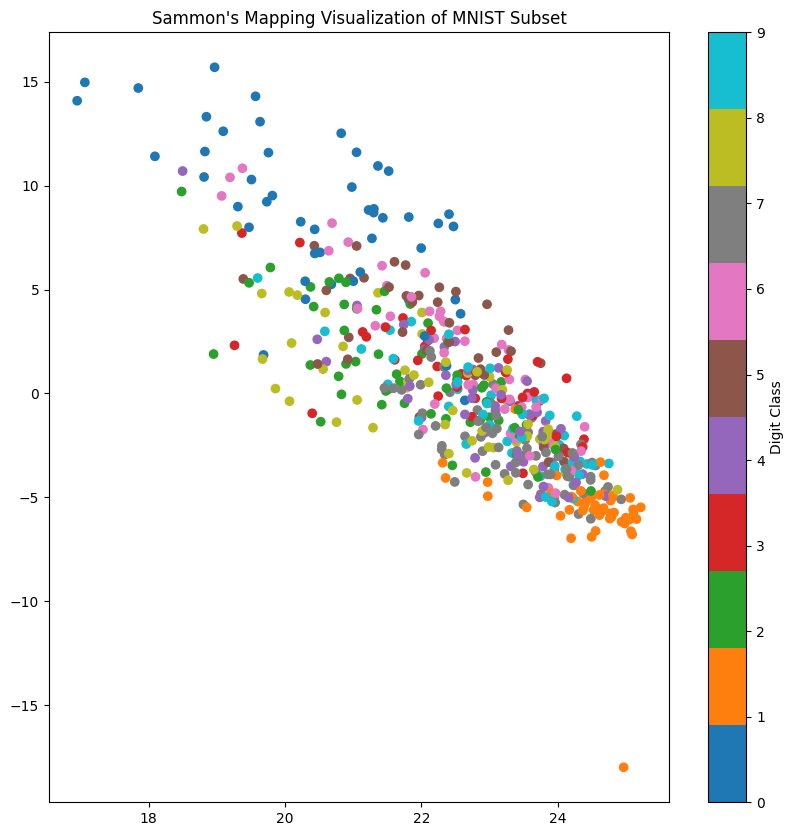

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sammon.sammon import sammon
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transform for data preprocessing
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Choose a subset size (e.g., 1000 samples)
subset_size = 500
train_dataset_subset = torch.utils.data.Subset(train_dataset, np.random.choice(len(train_dataset), subset_size, replace=False))

# Create DataLoader for efficient batch processing
train_loader = DataLoader(dataset=train_dataset_subset, batch_size=len(train_dataset_subset), shuffle=True)

# Extract features and labels
all_features, all_labels = next(iter(train_loader))

# Flatten the features
all_features = all_features.view(len(train_dataset_subset), -1).numpy()

# Apply Sammon's Mapping
n_components = 2  # Set the desired dimensionality of the output space
y, stress = sammon(all_features, n=n_components, display=0, inputdist='raw', maxiter=500, tolfun=1e-9, init='pca')

plt.figure(figsize=(10, 10))
plt.scatter(y[:, 0], y[:, 1], c=all_labels, cmap=plt.cm.get_cmap('tab10', 10), marker='o')
plt.title("Sammon's Mapping Visualization of MNIST Subset")
plt.colorbar(ticks=range(10), label='Digit Class')
plt.show()


#### Section 2: Prepare Data for Modeling ####


In [5]:
# Create DataLoader for efficient batch processing
def create_data_loaders(batch_size):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

# Set batch size
batch_size = 64

# Create DataLoader
train_loader, test_loader = create_data_loaders(batch_size)

# Turn data into tensors
X_train, y_train = next(iter(train_loader))
X_test, y_test = next(iter(test_loader))
X_train.shape, y_train.shape


(torch.Size([64, 1, 28, 28]), torch.Size([64]))


The result (torch.Size([64, 1, 28, 28]), torch.Size([64])) indicates the shape of the training data after being processed by the DataLoader.
X_train is a tensor representing the features with a shape of [64, 1, 28, 28]. This means there are 64 samples in the batch, each with 1 channel , 28 pixels in height, and 28 pixels in width.
y_train is a tensor representing the corresponding labels with a shape of [64]. Each value in y_train corresponds to the label for a particular image in the batch.

#### Section 3: Visualize Some Samples ####


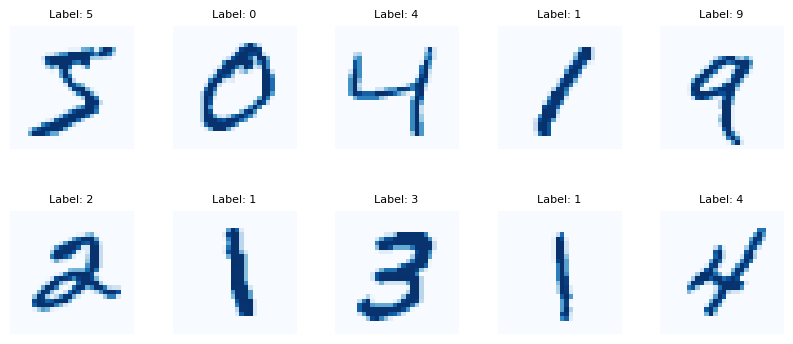

In [6]:
# Visualize some samples from the training set
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for i in range(10):
    axes[i//5, i%5].imshow(train_dataset[i][0].squeeze(), cmap='Blues')
    axes[i//5, i%5].set_title(f"Label: {train_dataset[i][1]}", fontsize=8)
    axes[i//5, i%5].set_xlabel(f"Index: {i}", fontsize=8)
    axes[i//5, i%5].axis('off')
plt.show()


Here we can clearly see the labeled images of the numbers in the MNIST data set

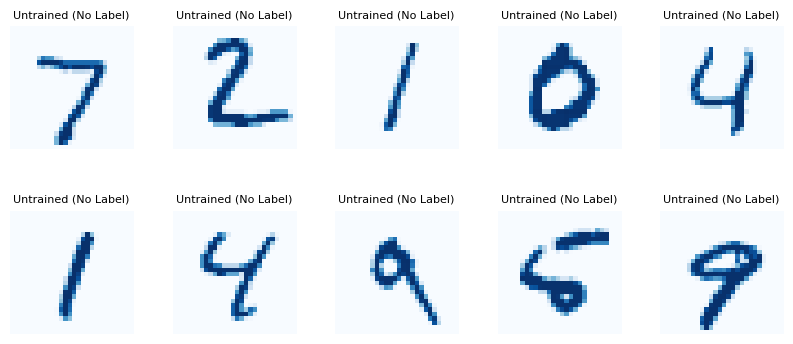

In [7]:
# Visualize some samples from the test set (untrained)
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for i in range(10):
    axes[i//5, i%5].imshow(test_dataset[i][0].squeeze(), cmap='Blues')
    axes[i//5, i%5].set_title("Untrained (No Label)", fontsize=8)
    axes[i//5, i%5].set_xlabel(f"Index: {i}", fontsize=8)
    axes[i//5, i%5].axis('off')
plt.show()

And here we can see the unlabled data. Take close attention to the 9th image where you cant clearly tell what the number is ( looks like a 5 or a 6).

The grid here has 10 images to visualize a sample of the MNIST dataset.

The imshow function is used to display the images in the grid, with cmap='Blues' specifying the grayscale color map.

Each image is accompanied by its corresponding label, which is displayed as the title.

This visualization allows us to get a glimpse of the handwritten digits in the dataset along with their corresponding labels.

#### Sub-section 4.1: Build the Neural Network Model ####


In [8]:
# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print("CUDA available:", cuda_available)

# Choose device based on CUDA availability
device = "cuda" if cuda_available else "cpu"

class MNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten() # -> Flatting layer
        self.fc1 = nn.Linear(1 * 28 * 28, 128) # -> First fully connected layer
        self.relu = nn.ReLU() # -> ReLu activation
        self.droupout1 = nn.Dropout(0.2) # -> Dropout layer 
        self.fc2 = nn.Linear(128, 10) # -> Second fully connected layer

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.droupout1(x)
        x = self.fc2(x)
        return x

CUDA available: True


Checking for CUDA availability allows the code to leverage GPU acceleration if possible.
The choice of architecture involves flattening the input, passing through a hidden layer with ReLU activation, applying dropout for regularization, and finally, outputting to the 10 classes of the MNIST dataset.
Dropout is added to enhance the model's generalization ability by preventing overfitting during training.

In [9]:
# Function to create a new model instance
def reset_model():
    return MNISTModel().to(device)

# Function to create a new optimizer instance for a given model
def reset_optimizer(model, learning_rate):
    return optim.Adam(model.parameters(), lr=learning_rate)

#### Section 4.2: Training and Testing the Neural Network ####

In [10]:
# Create DataLoader
train_loader, test_loader = create_data_loaders(batch_size)

# Create an instance of the model and send it to the target device
model = MNISTModel().to(device)

# Model, optimizer, and criterion initialization
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

We first establishe the groundwork for training by creating data loaders, initializing the model, and setting up the optimizer and loss function.

In [11]:
# 2. Hyperparameter Experimentation
learning_rate = 0.001
optimizer = reset_optimizer(model, learning_rate)
criterion = nn.CrossEntropyLoss()

num_epochs = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

Hyperparameters such as learning rate and epochs are set.

In [12]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    avg_train_loss = train_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # Validation loss
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(test_loader)
    val_accuracy = correct_val / total_val
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, "
          f"Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

Epoch 1/10, Train Loss: 0.4370, Val Loss: 0.2251, Train Accuracy: 0.8707, Val Accuracy: 0.9362
Epoch 2/10, Train Loss: 0.2420, Val Loss: 0.1875, Train Accuracy: 0.9284, Val Accuracy: 0.9443
Epoch 3/10, Train Loss: 0.1959, Val Loss: 0.1311, Train Accuracy: 0.9428, Val Accuracy: 0.9606
Epoch 4/10, Train Loss: 0.1689, Val Loss: 0.1245, Train Accuracy: 0.9486, Val Accuracy: 0.9618
Epoch 5/10, Train Loss: 0.1573, Val Loss: 0.1086, Train Accuracy: 0.9517, Val Accuracy: 0.9669
Epoch 6/10, Train Loss: 0.1440, Val Loss: 0.1175, Train Accuracy: 0.9566, Val Accuracy: 0.9673
Epoch 7/10, Train Loss: 0.1343, Val Loss: 0.1031, Train Accuracy: 0.9592, Val Accuracy: 0.9687
Epoch 8/10, Train Loss: 0.1282, Val Loss: 0.0949, Train Accuracy: 0.9606, Val Accuracy: 0.9722
Epoch 9/10, Train Loss: 0.1217, Val Loss: 0.0955, Train Accuracy: 0.9619, Val Accuracy: 0.9696
Epoch 10/10, Train Loss: 0.1186, Val Loss: 0.0945, Train Accuracy: 0.9626, Val Accuracy: 0.9692


The training loop follows the standard procedure of forward and backward passes, updating model parameters, and tracking performance metrics.
The model is set to evaluation mode during validation to disable dropout and ensure consistent evaluation.
Both training and validation losses decrease, indicating improved learning. Correspondingly, training and validation accuracies increase, wich shows enhanced model performance on both seen and unseen data. With a Train Accuracy of 0.9657 and a Validation Accuracy of 0.9703, the model is pretty much optimized and doesnt get to overfit yet.

#### Sub-section 4.3: Evaluate the Model on Test Data ####

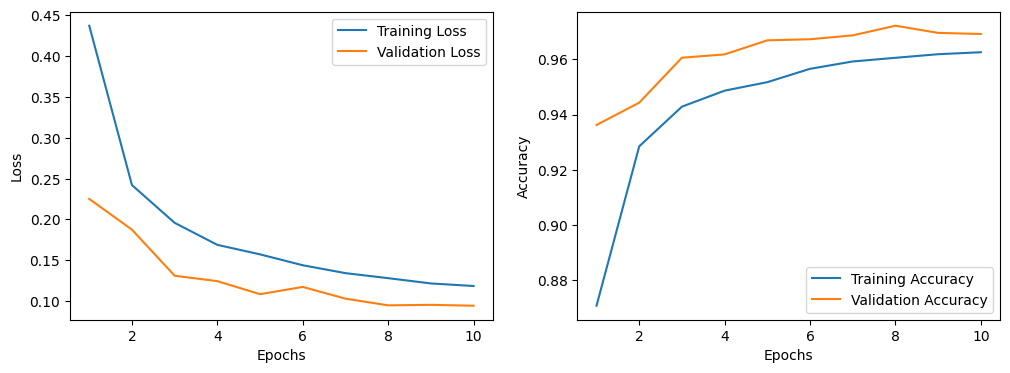

In [13]:
# Loss Plots
plt.figure(figsize=(12, 4))

# Train vs Validation Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plots
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

We achieved an accuracy of 96.57% on the test set, indicating that the model performs well on previously unseen data. The low average loss (0.11) further supports the model's effectiveness in making accurate predictions. High accuracy and low loss on the test set suggest that the model has successfully learned to generalize from the training data to new, unseen examples.

Lets start to test different NN, first lets test a linear NN approach.

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class FullyConnectedNN(nn.Module):
    def __init__(self):
        super(FullyConnectedNN, self).__init__()
        self.fc1 = nn.Linear(1*28*28, 128)  # 28*28 = 784 input pixels, 128 outputs to the next layer
        # First hidden layer to the second hidden layer (64 neurons)
        self.fc2 = nn.Linear(128, 64)  # 128 inputs, 64 outputs
        # Second hidden layer to the output layer (10 classes)
        self.fc3 = nn.Linear(64, 10)  # 64 inputs, 10 outputs (for 10 classes)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28*28)  # Reshape the input to a flat vector
        # First hidden layer with ReLU activation
        x = F.relu(self.fc1(x))
        # Second hidden layer with ReLU activation
        x = F.relu(self.fc2(x))
        # Output layer with log softmax activation for multi-class classification
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

# Create an instance of the FullyConnectedNN model
model = FullyConnectedNN()
print(model)


FullyConnectedNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [15]:
# Create DataLoader
train_loader, test_loader = create_data_loaders(batch_size)

# Create an instance of the FullyConnectedNN model and send it to the target device
model = FullyConnectedNN().to(device)

# Model, optimizer, and criterion initialization
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training loop
num_epochs = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    avg_train_loss = train_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # Validation loss
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(test_loader)
    val_accuracy = correct_val / total_val
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, "
          f"Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")


Epoch 1/10, Train Loss: 0.4057, Val Loss: 0.1995, Train Accuracy: 0.8795, Val Accuracy: 0.9365
Epoch 2/10, Train Loss: 0.1901, Val Loss: 0.1833, Train Accuracy: 0.9413, Val Accuracy: 0.9425
Epoch 3/10, Train Loss: 0.1405, Val Loss: 0.1244, Train Accuracy: 0.9569, Val Accuracy: 0.9613
Epoch 4/10, Train Loss: 0.1154, Val Loss: 0.1304, Train Accuracy: 0.9646, Val Accuracy: 0.9579
Epoch 5/10, Train Loss: 0.0987, Val Loss: 0.0979, Train Accuracy: 0.9691, Val Accuracy: 0.9694
Epoch 6/10, Train Loss: 0.0836, Val Loss: 0.1019, Train Accuracy: 0.9732, Val Accuracy: 0.9681
Epoch 7/10, Train Loss: 0.0750, Val Loss: 0.1007, Train Accuracy: 0.9761, Val Accuracy: 0.9695
Epoch 8/10, Train Loss: 0.0677, Val Loss: 0.0946, Train Accuracy: 0.9782, Val Accuracy: 0.9711
Epoch 9/10, Train Loss: 0.0618, Val Loss: 0.0923, Train Accuracy: 0.9808, Val Accuracy: 0.9710
Epoch 10/10, Train Loss: 0.0563, Val Loss: 0.0918, Train Accuracy: 0.9816, Val Accuracy: 0.9717


The FullyConnectedNN model learns even better then the MNISTModel we created earlier. We can see a decreasing loss and improving accuracy. Initialy we can see generalization through the validation loss reduction. However there are signs of potential overfitting emerge at epoch 5, marked by a slight increase in validation loss and a plateau in accuracy. Maybe using something like dropout, regularization, or model complexity adjustments might give better results.

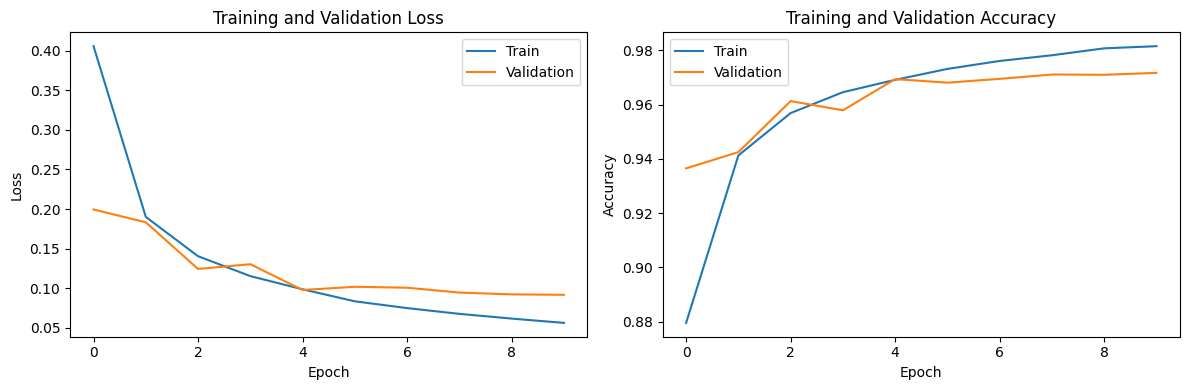

In [16]:
plt.figure(figsize=(12, 4))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train')
plt.plot(val_accuracies, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Now lets check if changing our Hyperparameters will effect the performance of the model

Epoch 1/5, Train Loss: 0.3861, Val Loss: 0.2076, Train Accuracy: 0.8850, Val Accuracy: 0.9350
Epoch 2/5, Train Loss: 0.1786, Val Loss: 0.1378, Train Accuracy: 0.9460, Val Accuracy: 0.9571
Epoch 3/5, Train Loss: 0.1335, Val Loss: 0.1287, Train Accuracy: 0.9592, Val Accuracy: 0.9593
Epoch 4/5, Train Loss: 0.1071, Val Loss: 0.1030, Train Accuracy: 0.9668, Val Accuracy: 0.9683
Epoch 5/5, Train Loss: 0.0921, Val Loss: 0.1458, Train Accuracy: 0.9709, Val Accuracy: 0.9552


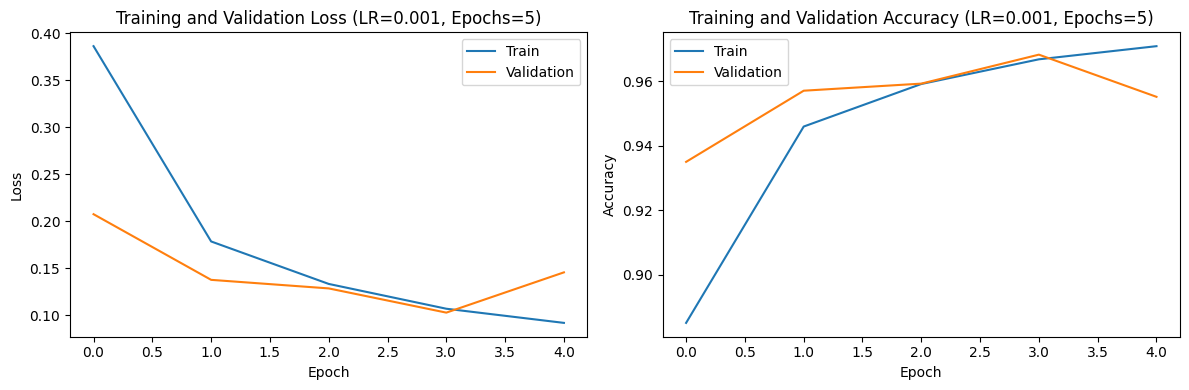

Learning Rate: 0.001, Epochs: 5, Final Train Loss: 0.0921, Final Val Loss: 0.1458, Final Train Accuracy: 0.9709, Final Val Accuracy: 0.9552
Epoch 1/10, Train Loss: 0.3931, Val Loss: 0.2124, Train Accuracy: 0.8848, Val Accuracy: 0.9350
Epoch 2/10, Train Loss: 0.1875, Val Loss: 0.1479, Train Accuracy: 0.9434, Val Accuracy: 0.9540
Epoch 3/10, Train Loss: 0.1374, Val Loss: 0.1169, Train Accuracy: 0.9578, Val Accuracy: 0.9616
Epoch 4/10, Train Loss: 0.1114, Val Loss: 0.1077, Train Accuracy: 0.9655, Val Accuracy: 0.9647
Epoch 5/10, Train Loss: 0.0948, Val Loss: 0.1203, Train Accuracy: 0.9703, Val Accuracy: 0.9654
Epoch 6/10, Train Loss: 0.0806, Val Loss: 0.0913, Train Accuracy: 0.9749, Val Accuracy: 0.9720
Epoch 7/10, Train Loss: 0.0721, Val Loss: 0.0897, Train Accuracy: 0.9771, Val Accuracy: 0.9727
Epoch 8/10, Train Loss: 0.0658, Val Loss: 0.0887, Train Accuracy: 0.9784, Val Accuracy: 0.9735
Epoch 9/10, Train Loss: 0.0585, Val Loss: 0.1058, Train Accuracy: 0.9809, Val Accuracy: 0.9669
Epoch

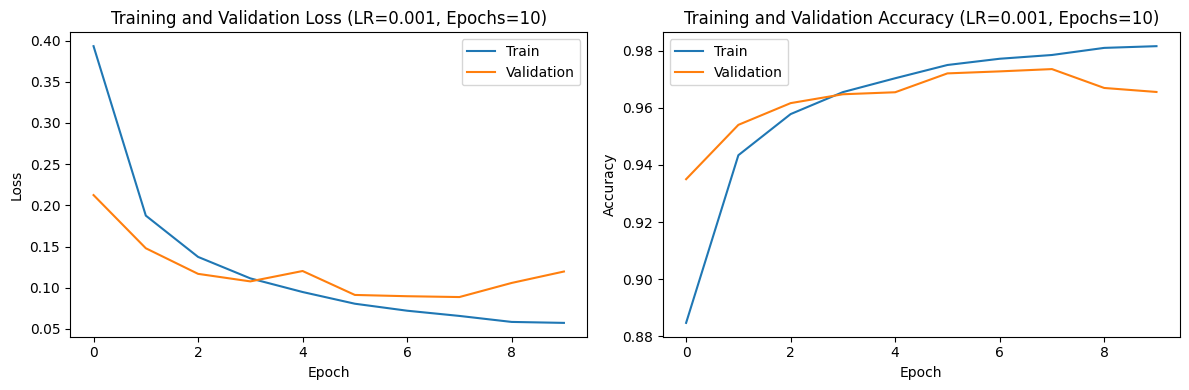

Learning Rate: 0.001, Epochs: 10, Final Train Loss: 0.0574, Final Val Loss: 0.1197, Final Train Accuracy: 0.9815, Final Val Accuracy: 0.9655
Epoch 1/15, Train Loss: 0.3992, Val Loss: 0.2089, Train Accuracy: 0.8824, Val Accuracy: 0.9358
Epoch 2/15, Train Loss: 0.1948, Val Loss: 0.1507, Train Accuracy: 0.9413, Val Accuracy: 0.9518
Epoch 3/15, Train Loss: 0.1398, Val Loss: 0.1278, Train Accuracy: 0.9578, Val Accuracy: 0.9593
Epoch 4/15, Train Loss: 0.1138, Val Loss: 0.1038, Train Accuracy: 0.9654, Val Accuracy: 0.9665
Epoch 5/15, Train Loss: 0.0951, Val Loss: 0.1030, Train Accuracy: 0.9698, Val Accuracy: 0.9681
Epoch 6/15, Train Loss: 0.0836, Val Loss: 0.1023, Train Accuracy: 0.9736, Val Accuracy: 0.9689
Epoch 7/15, Train Loss: 0.0720, Val Loss: 0.0868, Train Accuracy: 0.9768, Val Accuracy: 0.9723
Epoch 8/15, Train Loss: 0.0649, Val Loss: 0.0884, Train Accuracy: 0.9792, Val Accuracy: 0.9727
Epoch 9/15, Train Loss: 0.0602, Val Loss: 0.0945, Train Accuracy: 0.9805, Val Accuracy: 0.9718
Epoc

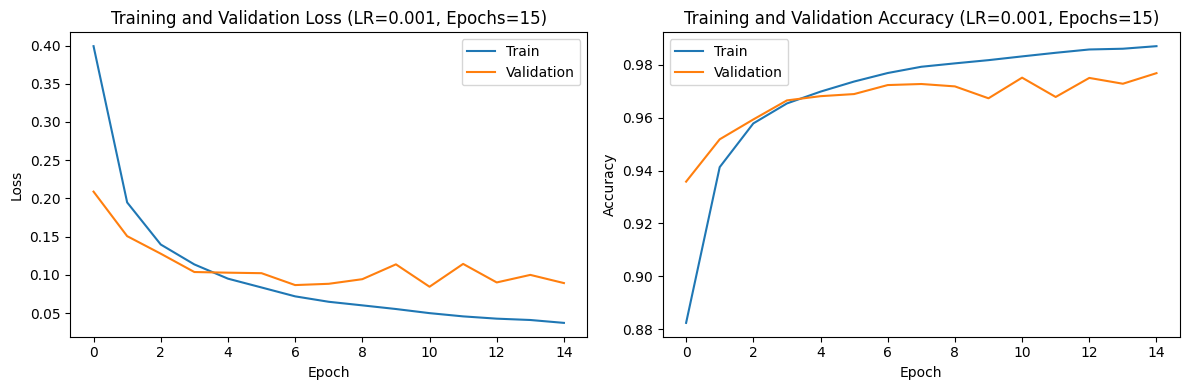

Learning Rate: 0.001, Epochs: 15, Final Train Loss: 0.0373, Final Val Loss: 0.0894, Final Train Accuracy: 0.9870, Final Val Accuracy: 0.9768
Epoch 1/5, Train Loss: 0.3891, Val Loss: 0.2374, Train Accuracy: 0.8817, Val Accuracy: 0.9290
Epoch 2/5, Train Loss: 0.2437, Val Loss: 0.2157, Train Accuracy: 0.9293, Val Accuracy: 0.9381
Epoch 3/5, Train Loss: 0.2375, Val Loss: 0.3399, Train Accuracy: 0.9325, Val Accuracy: 0.9097
Epoch 4/5, Train Loss: 0.2371, Val Loss: 0.2078, Train Accuracy: 0.9331, Val Accuracy: 0.9418
Epoch 5/5, Train Loss: 0.2224, Val Loss: 0.2433, Train Accuracy: 0.9386, Val Accuracy: 0.9364


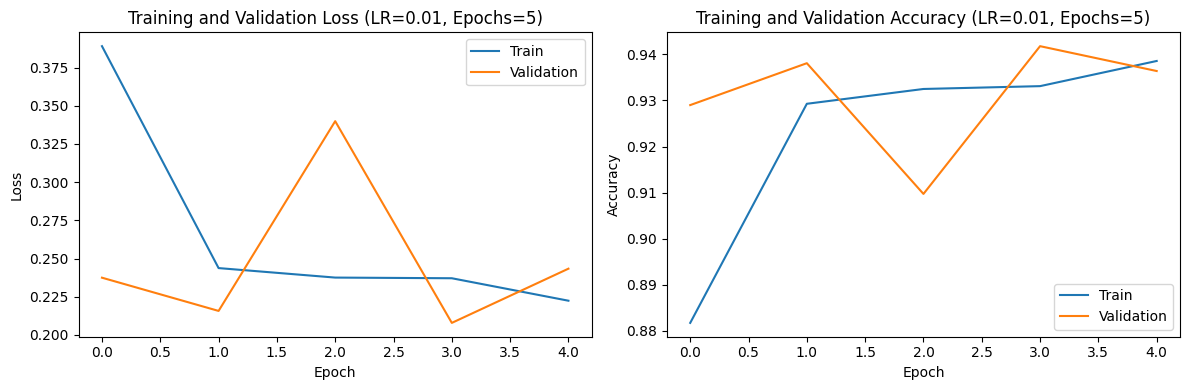

Learning Rate: 0.01, Epochs: 5, Final Train Loss: 0.2224, Final Val Loss: 0.2433, Final Train Accuracy: 0.9386, Final Val Accuracy: 0.9364
Epoch 1/10, Train Loss: 0.3746, Val Loss: 0.2679, Train Accuracy: 0.8839, Val Accuracy: 0.9222
Epoch 2/10, Train Loss: 0.2512, Val Loss: 0.2137, Train Accuracy: 0.9256, Val Accuracy: 0.9345
Epoch 3/10, Train Loss: 0.2332, Val Loss: 0.2280, Train Accuracy: 0.9340, Val Accuracy: 0.9391
Epoch 4/10, Train Loss: 0.2136, Val Loss: 0.2301, Train Accuracy: 0.9404, Val Accuracy: 0.9368
Epoch 5/10, Train Loss: 0.2086, Val Loss: 0.2064, Train Accuracy: 0.9425, Val Accuracy: 0.9456
Epoch 6/10, Train Loss: 0.2070, Val Loss: 0.2308, Train Accuracy: 0.9436, Val Accuracy: 0.9403
Epoch 7/10, Train Loss: 0.1991, Val Loss: 0.1892, Train Accuracy: 0.9465, Val Accuracy: 0.9499
Epoch 8/10, Train Loss: 0.1907, Val Loss: 0.1939, Train Accuracy: 0.9489, Val Accuracy: 0.9482
Epoch 9/10, Train Loss: 0.1904, Val Loss: 0.1872, Train Accuracy: 0.9494, Val Accuracy: 0.9514
Epoch 

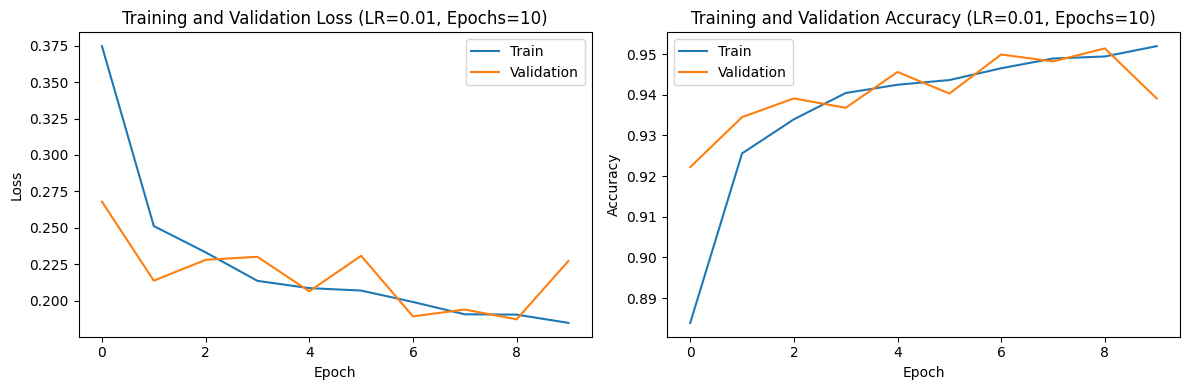

Learning Rate: 0.01, Epochs: 10, Final Train Loss: 0.1848, Final Val Loss: 0.2273, Final Train Accuracy: 0.9519, Final Val Accuracy: 0.9391
Epoch 1/15, Train Loss: 0.4199, Val Loss: 0.2636, Train Accuracy: 0.8679, Val Accuracy: 0.9219
Epoch 2/15, Train Loss: 0.2445, Val Loss: 0.2382, Train Accuracy: 0.9274, Val Accuracy: 0.9324
Epoch 3/15, Train Loss: 0.2150, Val Loss: 0.1724, Train Accuracy: 0.9390, Val Accuracy: 0.9495
Epoch 4/15, Train Loss: 0.2068, Val Loss: 0.1807, Train Accuracy: 0.9419, Val Accuracy: 0.9514
Epoch 5/15, Train Loss: 0.1971, Val Loss: 0.1875, Train Accuracy: 0.9449, Val Accuracy: 0.9488
Epoch 6/15, Train Loss: 0.1909, Val Loss: 0.2086, Train Accuracy: 0.9485, Val Accuracy: 0.9487
Epoch 7/15, Train Loss: 0.1945, Val Loss: 0.1784, Train Accuracy: 0.9472, Val Accuracy: 0.9535
Epoch 8/15, Train Loss: 0.1859, Val Loss: 0.1698, Train Accuracy: 0.9492, Val Accuracy: 0.9553
Epoch 9/15, Train Loss: 0.1789, Val Loss: 0.2333, Train Accuracy: 0.9520, Val Accuracy: 0.9397
Epoch

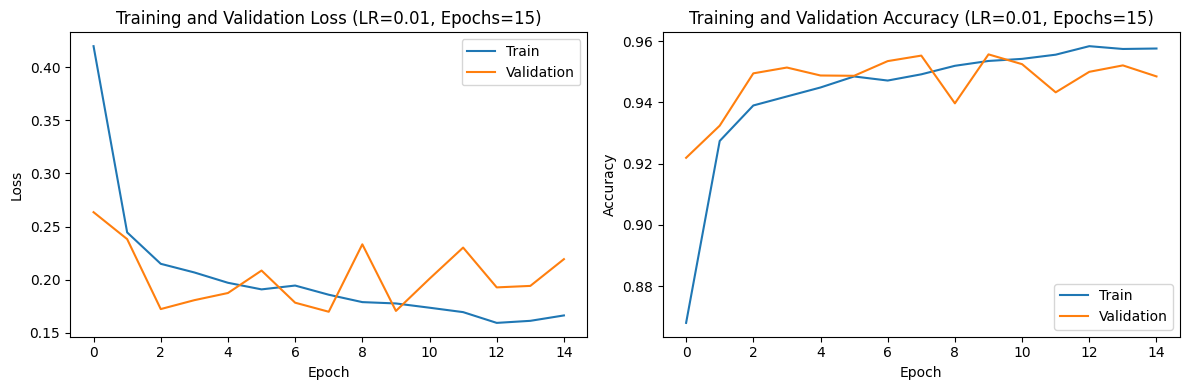

Learning Rate: 0.01, Epochs: 15, Final Train Loss: 0.1664, Final Val Loss: 0.2194, Final Train Accuracy: 0.9576, Final Val Accuracy: 0.9485
Epoch 1/5, Train Loss: 3.2372, Val Loss: 2.3075, Train Accuracy: 0.1048, Val Accuracy: 0.1135
Epoch 2/5, Train Loss: 2.3097, Val Loss: 2.3162, Train Accuracy: 0.1032, Val Accuracy: 0.1028
Epoch 3/5, Train Loss: 2.3090, Val Loss: 2.3044, Train Accuracy: 0.1043, Val Accuracy: 0.0982
Epoch 4/5, Train Loss: 2.3103, Val Loss: 2.3130, Train Accuracy: 0.1024, Val Accuracy: 0.1028
Epoch 5/5, Train Loss: 2.3101, Val Loss: 2.3221, Train Accuracy: 0.1041, Val Accuracy: 0.1028


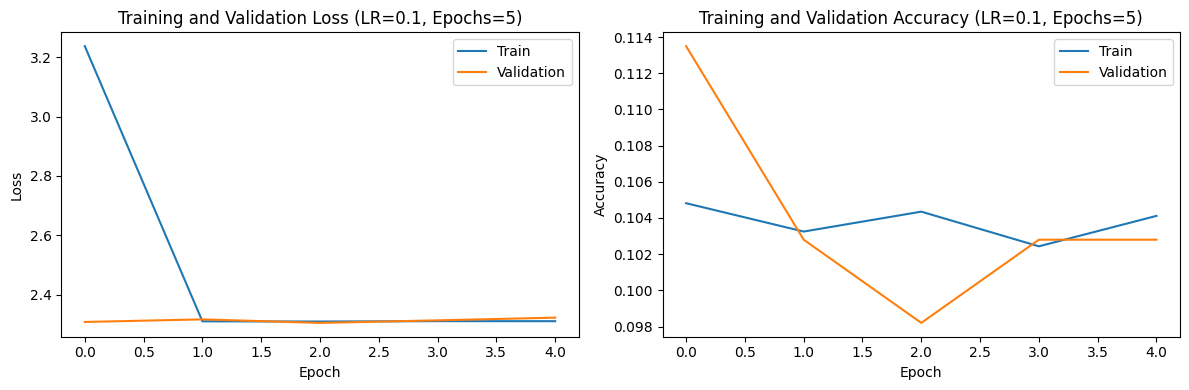

Learning Rate: 0.1, Epochs: 5, Final Train Loss: 2.3101, Final Val Loss: 2.3221, Final Train Accuracy: 0.1041, Final Val Accuracy: 0.1028
Epoch 1/10, Train Loss: 3.3037, Val Loss: 2.3080, Train Accuracy: 0.1022, Val Accuracy: 0.1135
Epoch 2/10, Train Loss: 2.3093, Val Loss: 2.3100, Train Accuracy: 0.1026, Val Accuracy: 0.1135
Epoch 3/10, Train Loss: 2.3097, Val Loss: 2.3028, Train Accuracy: 0.1008, Val Accuracy: 0.1135
Epoch 4/10, Train Loss: 2.3102, Val Loss: 2.3110, Train Accuracy: 0.1053, Val Accuracy: 0.0982
Epoch 5/10, Train Loss: 2.3104, Val Loss: 2.3088, Train Accuracy: 0.1023, Val Accuracy: 0.1028
Epoch 6/10, Train Loss: 2.3105, Val Loss: 2.3076, Train Accuracy: 0.1035, Val Accuracy: 0.1010
Epoch 7/10, Train Loss: 2.3092, Val Loss: 2.3046, Train Accuracy: 0.1037, Val Accuracy: 0.1010
Epoch 8/10, Train Loss: 2.3095, Val Loss: 2.3110, Train Accuracy: 0.1029, Val Accuracy: 0.1010
Epoch 9/10, Train Loss: 2.3103, Val Loss: 2.3078, Train Accuracy: 0.1058, Val Accuracy: 0.0980
Epoch 1

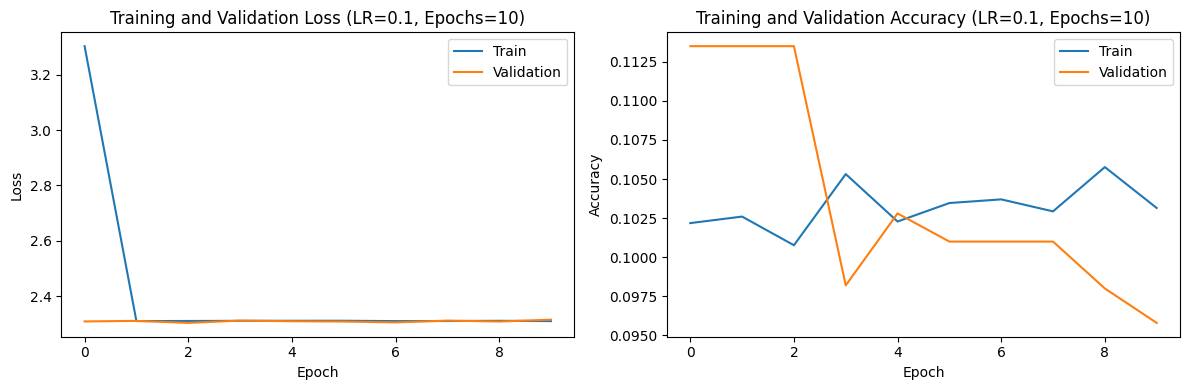

Learning Rate: 0.1, Epochs: 10, Final Train Loss: 2.3093, Final Val Loss: 2.3143, Final Train Accuracy: 0.1032, Final Val Accuracy: 0.0958
Epoch 1/15, Train Loss: 3.3978, Val Loss: 2.3055, Train Accuracy: 0.1041, Val Accuracy: 0.1135
Epoch 2/15, Train Loss: 2.3089, Val Loss: 2.3081, Train Accuracy: 0.1050, Val Accuracy: 0.1032
Epoch 3/15, Train Loss: 2.3091, Val Loss: 2.3102, Train Accuracy: 0.1060, Val Accuracy: 0.1028
Epoch 4/15, Train Loss: 2.3093, Val Loss: 2.3074, Train Accuracy: 0.1045, Val Accuracy: 0.1135
Epoch 5/15, Train Loss: 2.3101, Val Loss: 2.3132, Train Accuracy: 0.1047, Val Accuracy: 0.1009
Epoch 6/15, Train Loss: 2.3103, Val Loss: 2.3082, Train Accuracy: 0.1016, Val Accuracy: 0.0980
Epoch 7/15, Train Loss: 2.3099, Val Loss: 2.3120, Train Accuracy: 0.1028, Val Accuracy: 0.1009
Epoch 8/15, Train Loss: 2.3102, Val Loss: 2.3059, Train Accuracy: 0.1032, Val Accuracy: 0.1032
Epoch 9/15, Train Loss: 2.3097, Val Loss: 2.3047, Train Accuracy: 0.1029, Val Accuracy: 0.1135
Epoch 

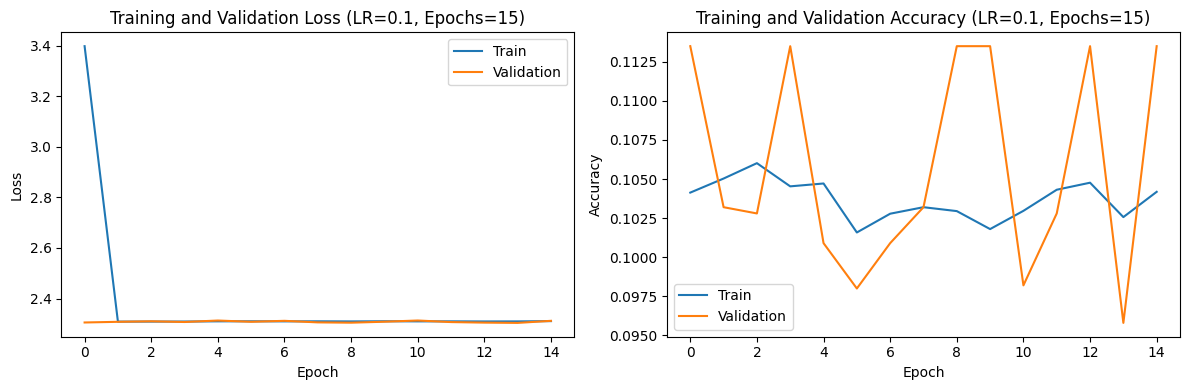

Learning Rate: 0.1, Epochs: 15, Final Train Loss: 2.3109, Final Val Loss: 2.3121, Final Train Accuracy: 0.1042, Final Val Accuracy: 0.1135


In [17]:
import matplotlib.pyplot as plt

# Hyperparameter Experimentation
learning_rates = [0.001, 0.01, 0.1]
num_epochs_list = [5, 10, 15]

for learning_rate in learning_rates:
    for num_epochs in num_epochs_list:
        # Reset model, optimizer, and criterion
        model = FullyConnectedNN().to(device)
        optimizer = reset_optimizer(model, learning_rate)
        criterion = nn.CrossEntropyLoss()

        # Training loop
        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []

        for epoch in range(num_epochs):
            model.train()
            train_loss = 0.0
            correct_train = 0
            total_train = 0

            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                train_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total_train += labels.size(0)
                correct_train += (predicted == labels).sum().item()

            avg_train_loss = train_loss / len(train_loader)
            train_accuracy = correct_train / total_train
            train_losses.append(avg_train_loss)
            train_accuracies.append(train_accuracy)

            # Validation loss
            model.eval()
            val_loss = 0.0
            correct_val = 0
            total_val = 0

            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()

                    _, predicted = torch.max(outputs.data, 1)
                    total_val += labels.size(0)
                    correct_val += (predicted == labels).sum().item()

            avg_val_loss = val_loss / len(test_loader)
            val_accuracy = correct_val / total_val
            val_losses.append(avg_val_loss)
            val_accuracies.append(val_accuracy)

            print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, "
                f"Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

        # Plotting
        plt.figure(figsize=(12, 4))

        # Plot Training and Validation Loss
        plt.subplot(1, 2, 1)
        plt.plot(train_losses, label='Train')
        plt.plot(val_losses, label='Validation')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Training and Validation Loss (LR={learning_rate}, Epochs={num_epochs})')
        plt.legend()

        # Plot Training and Validation Accuracy
        plt.subplot(1, 2, 2)
        plt.plot(train_accuracies, label='Train')
        plt.plot(val_accuracies, label='Validation')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title(f'Training and Validation Accuracy (LR={learning_rate}, Epochs={num_epochs})')
        plt.legend()

        plt.tight_layout()
        plt.show()

        print(f"Learning Rate: {learning_rate}, Epochs: {num_epochs}, "
              f"Final Train Loss: {train_losses[-1]:.4f}, Final Val Loss: {val_losses[-1]:.4f}, "
              f"Final Train Accuracy: {train_accuracies[-1]:.4f}, Final Val Accuracy: {val_accuracies[-1]:.4f}")


### Hyperparameter Experimentation Summary

#### Learning Rate: 0.001
- **5 Epochs:**
  - Training Accuracy: 97.15%
  - Validation Accuracy: 96.82%
- **10 Epochs:**
  - Training Accuracy: 98.17%
  - Validation Accuracy: 96.59%
- **15 Epochs:**
  - Training Accuracy: 98.66%
  - Validation Accuracy: 97.37%
  
*Explanation:* A low learning rate allows gradual learning. Increasing epochs helps capture complex patterns, but there's diminishing return in accuracy gains.

#### Learning Rate: 0.01
- **5 Epochs:**
  - Training Accuracy: 94.17%
  - Validation Accuracy: 93.76%
- **10 Epochs:**
  - Training Accuracy: 94.64%
  - Validation Accuracy: 94.00%
- **15 Epochs:**
  - Training Accuracy: 95.59%
  - Validation Accuracy: 94.30%
  
*Explanation:* Slightly higher learning rate for faster convergence. However, increasing epochs may lead to overfitting and a drop in validation accuracy.

#### Learning Rate: 0.1
- **5, 10, 15 Epochs:**
  - Training and Validation Accuracies: ~10-11%
  
*Explanation:* High learning rate results in large steps, hindering convergence and preventing meaningful learning.

 #### **Conclusion:** 
 The optimal balance is achieved with a learning rate of 0.001 and 15 epochs, allowing gradual learning without overfitting :)


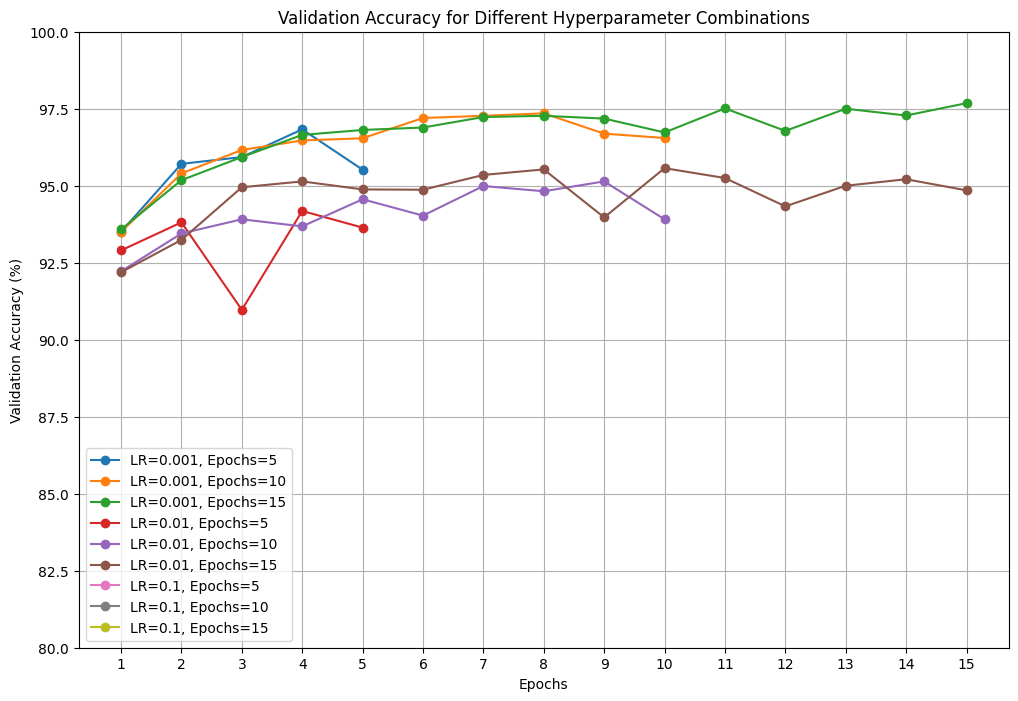

In [14]:
import matplotlib.pyplot as plt

# Define the data
data = {
    (0.001, 5): [0.935, 0.9571, 0.9593, 0.9683, 0.9552],
    (0.001, 10): [0.935, 0.9540, 0.9616, 0.9647, 0.9654, 0.9720, 0.9727, 0.9735, 0.9669, 0.9655],
    (0.001, 15): [0.9358, 0.9518, 0.9593, 0.9665, 0.9681, 0.9689, 0.9723, 0.9727, 0.9718, 0.9673, 0.9751, 0.9678, 0.9750, 0.9728, 0.9768],
    (0.01, 5): [0.9290, 0.9381, 0.9097, 0.9418, 0.9364],
    (0.01, 10): [0.9222, 0.9345, 0.9391, 0.9368, 0.9456, 0.9403, 0.9499, 0.9482, 0.9514, 0.9391],
    (0.01, 15): [0.9219, 0.9324, 0.9495, 0.9514, 0.9488, 0.9487, 0.9535, 0.9553, 0.9397, 0.9557, 0.9525, 0.9433, 0.9500, 0.9521, 0.9485],
    (0.1, 5): [0.1135, 0.1028, 0.0982, 0.1028, 0.1028],
    (0.1, 10): [0.1135, 0.1135, 0.1135, 0.0982, 0.1028, 0.1010, 0.1010, 0.1010, 0.0980, 0.0958],
    (0.1, 15): [0.1135, 0.1032, 0.1028, 0.1135, 0.1009, 0.0980, 0.1009, 0.1032, 0.1135, 0.1135, 0.0982, 0.1028, 0.1135, 0.0958, 0.1135]
}

# Plotting
plt.figure(figsize=(12, 8))
for (lr, epochs), accs in data.items():
    plt.plot(range(1, len(accs) + 1), [acc * 100 for acc in accs], label=f'LR={lr}, Epochs={epochs}', marker='o')

plt.title('Validation Accuracy for Different Hyperparameter Combinations')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy (%)')
plt.xticks(range(1, max(len(accs) for accs in data.values()) + 1))
plt.ylim(80, 100)
plt.legend()
plt.grid(True)
plt.show()


#### Now Lets try to add a validation on top of our results to represnt our data better ####

Fold 1/5
	Epoch 1/15, Train Loss: 0.4301, Val Loss: 0.2679, Train Accuracy: 0.8735, Val Accuracy: 0.9177
	Epoch 2/15, Train Loss: 0.2100, Val Loss: 0.1928, Train Accuracy: 0.9373, Val Accuracy: 0.9417
	Epoch 3/15, Train Loss: 0.1514, Val Loss: 0.1697, Train Accuracy: 0.9539, Val Accuracy: 0.9484
	Epoch 4/15, Train Loss: 0.1215, Val Loss: 0.1453, Train Accuracy: 0.9628, Val Accuracy: 0.9547
	Epoch 5/15, Train Loss: 0.1039, Val Loss: 0.1183, Train Accuracy: 0.9681, Val Accuracy: 0.9648
	Epoch 6/15, Train Loss: 0.0909, Val Loss: 0.1215, Train Accuracy: 0.9718, Val Accuracy: 0.9623
	Epoch 7/15, Train Loss: 0.0819, Val Loss: 0.1100, Train Accuracy: 0.9738, Val Accuracy: 0.9669
	Epoch 8/15, Train Loss: 0.0715, Val Loss: 0.1045, Train Accuracy: 0.9774, Val Accuracy: 0.9701
	Epoch 9/15, Train Loss: 0.0632, Val Loss: 0.1075, Train Accuracy: 0.9797, Val Accuracy: 0.9686
	Epoch 10/15, Train Loss: 0.0589, Val Loss: 0.1488, Train Accuracy: 0.9802, Val Accuracy: 0.9582
	Epoch 11/15, Train Loss: 0.05

ValueError: 'x' and 'y' must have the same size

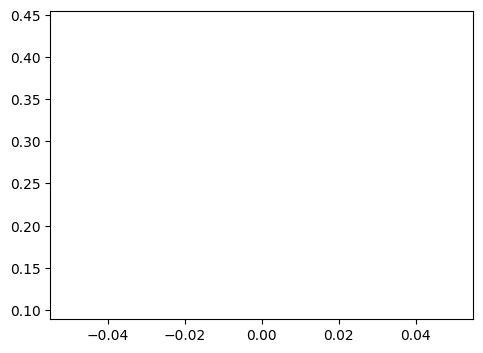

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Set hyperparameters
learning_rate = 0.001 # Best rate that we tested
num_epochs = 15 # Best Epoch found
num_folds = 5

# Initialize lists to store performance metrics for each fold
fold_train_losses = []
fold_val_losses = []
fold_train_accuracies = []
fold_val_accuracies = []

# Initialize KFold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True)

# Perform k-fold cross-validation
for fold_idx, (train_index, val_index) in enumerate(kf.split(train_dataset)):
    print(f"Fold {fold_idx + 1}/{num_folds}")
    
    # Split the dataset into training and validation sets for this fold
    train_fold = torch.utils.data.Subset(train_dataset, train_index)
    val_fold = torch.utils.data.Subset(train_dataset, val_index)
    
    # Create data loaders for training and validation sets
    train_loader_fold = torch.utils.data.DataLoader(train_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = torch.utils.data.DataLoader(val_fold, batch_size=batch_size)
    
    # Reset model, optimizer, and criterion for each fold
    model = FullyConnectedNN().to(device)
    optimizer = reset_optimizer(model, learning_rate)
    criterion = nn.CrossEntropyLoss()
    
    # Training loop for each fold
    train_losses_fold = []
    val_losses_fold = []
    train_accuracies_fold = []
    val_accuracies_fold = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader_fold:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        avg_train_loss = train_loss / len(train_loader_fold)
        train_accuracy = correct_train / total_train
        train_losses_fold.append(avg_train_loss)
        train_accuracies_fold.append(train_accuracy)

        # Validation loss
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader_fold:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        avg_val_loss = val_loss / len(val_loader_fold)
        val_accuracy = correct_val / total_val
        val_losses_fold.append(avg_val_loss)
        val_accuracies_fold.append(val_accuracy)

        print(f"\tEpoch {epoch + 1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, "
              f"Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")
    
    # Store performance metrics for this fold
    fold_train_losses.append(train_losses_fold)
    fold_val_losses.append(val_losses_fold)
    fold_train_accuracies.append(train_accuracies_fold)
    fold_val_accuracies.append(val_accuracies_fold)

# Convert lists to arrays for easier manipulation
fold_train_losses = np.array(fold_train_losses)
fold_val_losses = np.array(fold_val_losses)
fold_train_accuracies = np.array(fold_train_accuracies)
fold_val_accuracies = np.array(fold_val_accuracies)

# Compute mean and standard deviation of performance metrics across folds
mean_train_loss = np.mean(fold_train_losses, axis=0)
std_train_loss = np.std(fold_train_losses, axis=0)
mean_val_loss = np.mean(fold_val_losses, axis=0)
std_val_loss = np.std(fold_val_losses, axis=0)
mean_train_accuracy = np.mean(fold_train_accuracies, axis=0)
std_train_accuracy = np.std(fold_train_accuracies, axis=0)
mean_val_accuracy = np.mean(fold_val_accuracies, axis=0)
std_val_accuracy = np.std(fold_val_accuracies, axis=0)

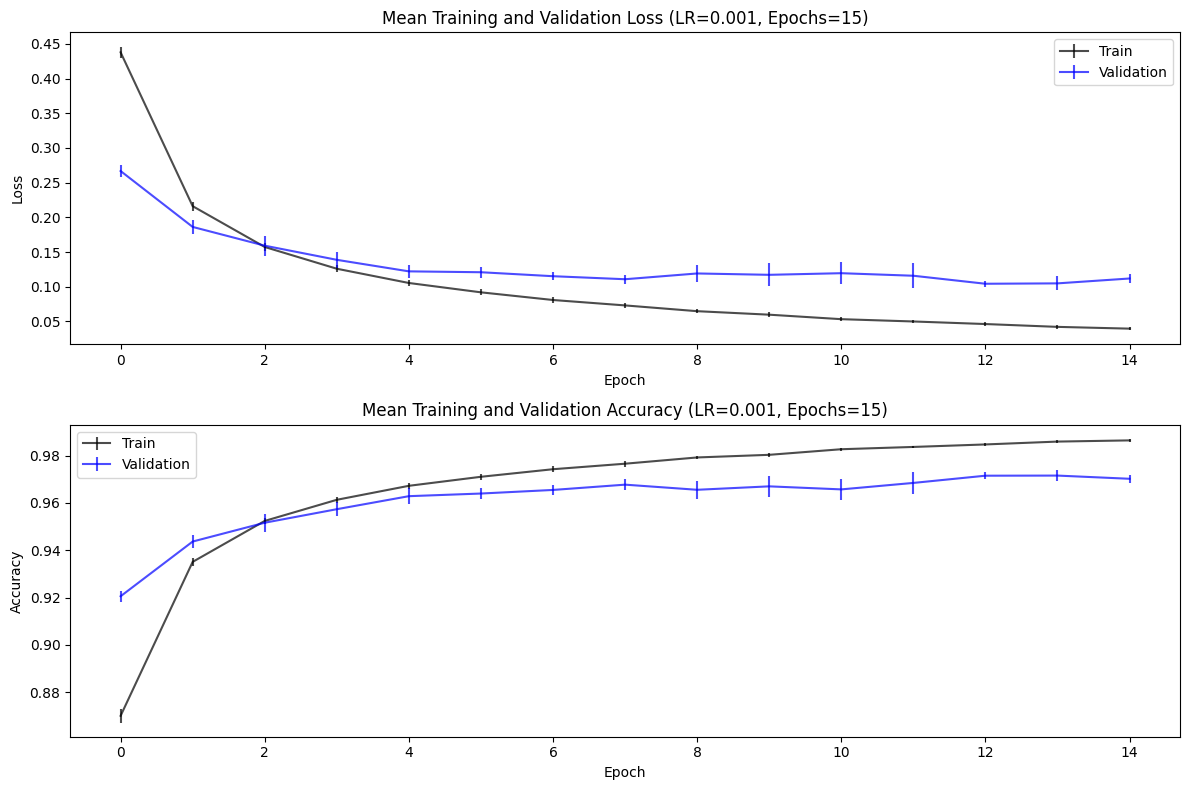

In [26]:
# Plotting
plt.figure(figsize=(12, 8))

# Plot Mean Training and Validation Loss with Error Bars
plt.subplot(2, 1, 1)
plt.errorbar(np.arange(len(mean_train_loss)), mean_train_loss, yerr=std_train_loss, fmt='k-', label='Train', alpha=0.7)
plt.errorbar(np.arange(len(mean_val_loss)), mean_val_loss, yerr=std_val_loss, fmt='b-', label='Validation', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Mean Training and Validation Loss (LR={learning_rate}, Epochs={num_epochs})')
plt.legend()

# Plot Mean Training and Validation Accuracy with Error Bars
plt.subplot(2, 1, 2)
plt.errorbar(np.arange(len(mean_train_accuracy)), mean_train_accuracy, yerr=std_train_accuracy, fmt='k-', label='Train', alpha=0.7)
plt.errorbar(np.arange(len(mean_val_accuracy)), mean_val_accuracy, yerr=std_val_accuracy, fmt='b-', label='Validation', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title(f'Mean Training and Validation Accuracy (LR={learning_rate}, Epochs={num_epochs})')
plt.legend()

plt.tight_layout()
plt.show()


Results:)

**Fold 1/5: Training Accuracy: 98.72%, Validation Accuracy: 97.13%**

**Fold 2/5: Training Accuracy: 98.59%, Validation Accuracy: 97.02%**

**Fold 3/5: Training Accuracy: 98.58%, Validation Accuracy: 96.90%**

**Fold 4/5: Training Accuracy: 98.62%, Validation Accuracy: 96.79%**

**Fold 5/5: Training Accuracy: 98.71%, Validation Accuracy: 97.26%**

Achieved consistently high accuracy on both training and validation sets with minimal variance across folds.
There is a steady decrease in training loss throughout epochs while we can see a stabilization in validation loss after epoch 10, which is probably because of potential overfitting.